## Processing neural datasets
Process neural datasets into python structures for smaller storage size and faster access

In [1]:
%load_ext autoreload
%autoreload 2


import neural_datasets

from pprint import pprint

import os
if not os.path.exists('../data'):
    os.makedirs('../data')
if not os.path.exists('../data/datasets'):
    os.makedirs('../data/datasets')


datadir = '/scratches/ramanujan_2/dl543/'
datadir2 = '/scratches/sagarmatha_2/ktj21/data/crcns/'

We load the dataset for one session from the original files downloaded from [CRCNR.org](https://crcns.org/), which is then preprocessed and put into a pickle file in the ```../data/datasets``` directory.


    if mouse_id == 'Mouse12':
        """
        Anterior Thalamus:
        Electrode groups: 1-8.
        8 shank probe, Neuronexus Buz64 design. Shank #1 is the most lateral, #8 the most medial
        Probe is perpendicular to the midline (coronal plane), tilted by 15 degrees (tips pointed toward midline)
        , mounted on a movable drive.
        Insertion coordinates: AP -0.7mm, ML 0.5mm
        Approx depth from surface: 2.97mm

        medial Prefrontal (Prelimbic):
        Electrode Groups: 9-12
        4 tetrodes
        Insertion coordinates: AP 1.78 - 1.94mm, ML 0.5mm, depth: 1.7mm

        Hippocampus:
        Electrode group: 14.
        5 tungsten wires (fifty micrometer in diamater), one (at least) is in the pyramidal layer of CA1 as shown
         by the presence of Sharp-Wave/Ripples.
        Insertion coordinates: AP -2.2mm, ML 1.3mm, depth: 1.7mm
        """

        channels = {
            'ANT': [1, 2, 3, 4, 5, 6, 7, 8],
            'mPFC': [9, 10, 11, 12, 13], 
            'CA1': [14]
        }
    elif mouse_id == 'Mouse28':
        """
        Postsubiculum:
        Electrode groups 1-7.
        6 shank probe, Neuronexus Buz64sp design. Shank #1 is the most medial, #6 the most lateral, group #7 made
         of the four sites located above 4th shank (see design).
        Approx depth from surface: 1.28mm

        Anterior thalamus:
        Electrode groups 8-11.
        4 shank probe, Neuronexus Buz32 design. Shank #8 is the most lateral, #11 the most medial.
        Approx depth from surface: 2.56mm
        """
        channels = {
            'PoS': [1, 2, 3, 4, 5, 6, 7], 
            'ANT': [8, 9, 10, 11]
        }

    elif mouse_id == 'Mouse24':
        """
        Post-subiculum:
        Electrode Groups: 1-4
        4 shank probe, Neuronexus Buz32 design. Shank #1 is the most medial, #4 the most lateral
        Probe is perpendicular to the midline (coronal plane), tilted by 10 degrees (tips pointed away from midli
        ne), mounted on a movable drive.
        Insertion coordinates: AP -4.25mm, ML 1.2-1.9mm
        Approx depth from surface: 1.06mm

        Anterior Thalamus:
        Electrode groups: 5-8.
        4 shank probe, Neuronexus Buz32 design. Shank #1 (5th electrode group) is the most lateral, #4 (8th elect
        rode group) the most medial
        Probe is perpendicular to the midline (coronal plane), mounted on a movable drive.
        Insertion coordinates: AP -0.7mm, ML 0.5-1.2mm
        Approx depth from surface: 3.11mm
        """
        channels = {
            'PoS': [1, 2, 3, 4],
            'ANT': [5, 6, 7, 8]
        }

    elif mouse_id == 'Mouse25':
        """
        Post-subiculum:
        Electrode Groups: 1-4
        4 shank probe, Neuronexus Buz32 design. Shank #1 is the most medial, #4 the most lateral
        Probe is perpendicular to the midline (coronal plane), tilted by 10 degrees (tips pointed away from midli
        ne), mounted on a movable drive.
        Insertion coordinates: AP -4.25mm, ML 1.2-1.9mm
        Approx depth from surface: 2.4mm

        Anterior Thalamus:
        Electrode groups: 5-8.
        4 shank probe, Neuronexus Buz32 design. Shank #1 (5th electrode group) is the most lateral, #4 (8th elect
        rode group) the most medial
        Probe is perpendicular to the midline (coronal plane), mounted on a movable drive.
        Insertion coordinates: AP -0.7mm, ML 0.5-1.2mm
        Approx depth from surface: 2.72mm
        """
        channels = {
            'PoS': [1, 2, 3, 4],
            'ANT': [5, 6, 7, 8]
        }

In [2]:
mice_channels = {
    'Mouse12': {'ANT': [1, 2, 3, 4, 5, 6, 7, 8],
                'mPFC': [9, 10, 11, 12], 
                'CA1': [13]},
    'Mouse17': {'ANT': [1, 2, 3, 4, 5, 6, 7, 8],
                'CA1': [9]},
    'Mouse20': {'ANT': [1, 3, 4, 5, 6, 7, 8]},
    'Mouse24': {'PoS': [1, 2, 3, 4],
                'ANT': [5, 6, 7, 8]},
    'Mouse25': {'PoS': [1, 2, 3, 4],
                'ANT': [5, 6, 7, 8]},
    'Mouse28': {'PoS': [1, 2, 3, 4, 5, 6, 7], 
                'ANT': [8, 9, 10, 11]},
}

mice_sessions = {
    'Mouse12': ['120806', '120807', '120809', '120810' ], # '120808' is missing position files
    'Mouse17': ['130125', '130128', '130129', '130130', '130131', '130201', '130202', '130203', '130204'],
    'Mouse20': ['130514', '130515', '130516', '130517', '130520'],
    'Mouse24': ['131213', '131216', '131217','131218'],
    'Mouse25': ['140123', '140124', '140128', '140129', '140130', '140131', '140203', '140204', '140205', '140206'],
    'Mouse28': ['140310', '140311', '140312', '140313', '140317', '140318'],
} 

In [ ]:
# Mice sleep/wake exploration, head direction cells
datadir2 = '/scratches/sagarmatha_2/ktj21/data/crcns/th-1/data/'

for mouse_id in mice_sessions.keys():
    for session_id in mice_sessions[mouse_id]:
        print(mouse_id, session_id)
        channels = mice_channels[mouse_id]

        # behav_tbin = 0.025599999999940337
        data_class = neural_datasets.peyrache_th1(datadir2, mouse_id, session_id, channels)

        periods = data_class.get_periods()
        #pprint(periods, indent=2, sort_dicts=False)

        time_limits = [periods['wake'][0]['start'], periods['wake'][0]['end']]  # pick wake session
        phase = 'wake'
        savef = '../data/datasets/th1_{}_{}_{}.p'.format(mouse_id, session_id, phase)
        d = data_class.load_preprocess_save(savef, time_limits)

Mouse12 120806
Behaviour time bin size 2.56e-02 s.
Empty channel shank 4 cluster 3.
Mouse12 120807
Behaviour time bin size 2.56e-02 s.
Mouse12 120809
Behaviour time bin size 2.56e-02 s.
Empty channel shank 8 cluster 0.
Empty channel shank 9 cluster 0.
Empty channel shank 10 cluster 0.
Empty channel shank 11 cluster 0.
Empty channel shank 12 cluster 0.


/var/home/dl543/Documents/Learning/UCM-interpret/preprocess/neural_datasets.py:275: RuntimeWarning: invalid value encountered in long_scalars
  refract_viol[u] = (ISI[u] <= viol_ISI).sum()/len(ISI[u])


Mouse12 120810
Behaviour time bin size 2.56e-02 s.
Mouse17 130125
Behaviour time bin size 2.56e-02 s.
Mouse17 130128
Behaviour time bin size 2.56e-02 s.
Mouse17 130129
Behaviour time bin size 2.56e-02 s.
Empty channel shank 6 cluster 2.
Mouse17 130130
Behaviour time bin size 2.56e-02 s.
Mouse17 130131
Behaviour time bin size 2.56e-02 s.
Mouse17 130201
Behaviour time bin size 2.56e-02 s.
Mouse17 130202
Behaviour time bin size 2.56e-02 s.
Empty channel shank 5 cluster 7.
Mouse17 130203
Behaviour time bin size 2.56e-02 s.
Mouse17 130204
Behaviour time bin size 2.56e-02 s.
Mouse20 130514
Behaviour time bin size 2.56e-02 s.
Mouse20 130515
Behaviour time bin size 2.56e-02 s.
Mouse20 130516
Behaviour time bin size 2.56e-02 s.
Mouse20 130517
Behaviour time bin size 2.56e-02 s.
Mouse20 130520
Behaviour time bin size 2.56e-02 s.
Mouse24 131213
Behaviour time bin size 2.56e-02 s.
Empty channel shank 4 cluster 1.
Mouse24 131216
Behaviour time bin size 2.56e-02 s.
Mouse24 131217
Behaviour time bin 

In [ ]:
time_limits = [periods['wake'][0]['start'], periods['wake'][0]['end']]  # pick wake session
d = data_class.load_preprocess_save(None, time_limits)

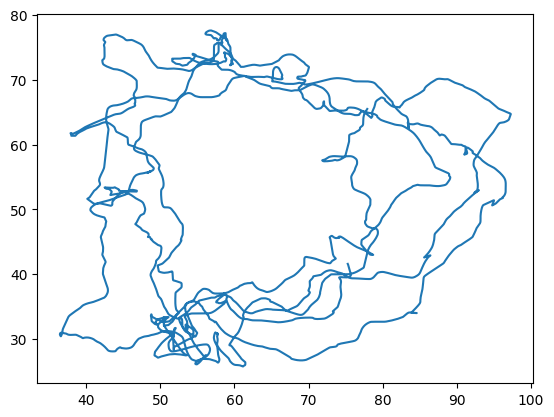

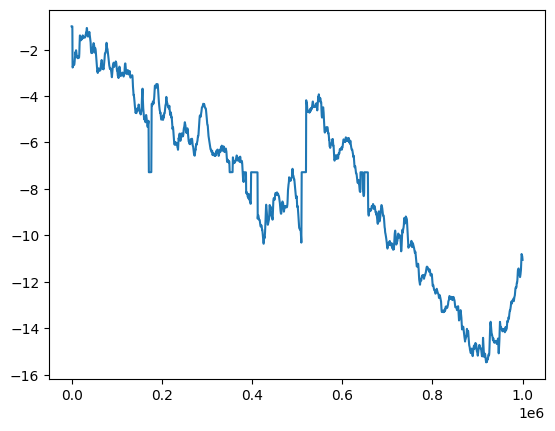

In [10]:
import matplotlib.pyplot as plt

plt.plot(d['covariates']['x'][:1000000], d['covariates']['y'][:1000000])
plt.show()

plt.plot(d['covariates']['hd'][:1000000])
plt.show()

In [12]:
d['covariates']['invalid_behaviour']
data_class.load_preprocess_save(savef, time_limits)  # save to file

Behaviour time bin size 2.56e-02 s.
Empty channel shank 4 cluster 3.
